In [1]:
from pathlib import Path
from IPython.display import Image

from data_utils import load_params, load_results, convert_test_scores_to_sample_scores
from eval import calculate_cf_matrix, plot_cf_matrix
import yaml

# Load data

In [8]:
# import parameters
params_path = Path('./params.yml')
import_params = load_params(params_path, 'import_params')

# import results.txt file and extract information from file names 
df_results_image_based = load_results(import_params.import_file_path, import_params)
df_results_image_based

,image_name,category,sample,revolution,trigger,prediction,truth
0,/home/tonytrieu/datasets/Cilag/C61/C61_Airline...,C61_Airline_balanced,43,3,5,0,1
1,/home/tonytrieu/datasets/Cilag/C61/C61_Airline...,C61_Airline_balanced,64,8,6,1,0
2,/home/tonytrieu/datasets/Cilag/C61/C61_Airline...,C61_Airline_balanced,25,3,8,0,0
3,/home/tonytrieu/datasets/Cilag/C61/C61_Airline...,C61_Airline_balanced,25,8,8,0,1
4,/home/tonytrieu/datasets/Cilag/C61/C61_Airline...,C61_Airline_balanced,3,4,3,1,0
...,...,...,...,...,...,...,...
92,/home/tonytrieu/datasets/Cilag/C61/C61_Airline...,C61_Airline_balanced,68,9,8,0,1
93,/home/tonytrieu/datasets/Cilag/C61/C61_Airline...,C61_Airline_balanced,13,10,4,1,0
94,/home/tonytrieu/datasets/Cilag/C61/C61_Airline...,C61_Airline_balanced,16,2,10,0,0
95,/home/tonytrieu/datasets/Cilag/C61/C61_Airline...,C61_Airline_balanced,12,5,8,0,0


# Filter categories and save data frame

In [9]:
# filter relevant categories
include_categories = [
    'Airline',
    'Verformt',
    'BeschStopfen_',
    'MarkStopfen_',
    'PartikelIglo_',
    'FaserStopfen',
    'LyoStopfen',
    'Gut'
]

with open(params_path, 'r') as file:
    params = yaml.safe_load(file)
    export_params = params['export_params']

# df_results_image_based = df_results_image_based[df_results_image_based.category.isin(include_categories)]

# save new data frame to csv file
path_image_based_csv = export_params['export_path'] + r'\image_based_scores.csv'
df_results_image_based.to_csv(path_image_based_csv)

# Image-based evaluation

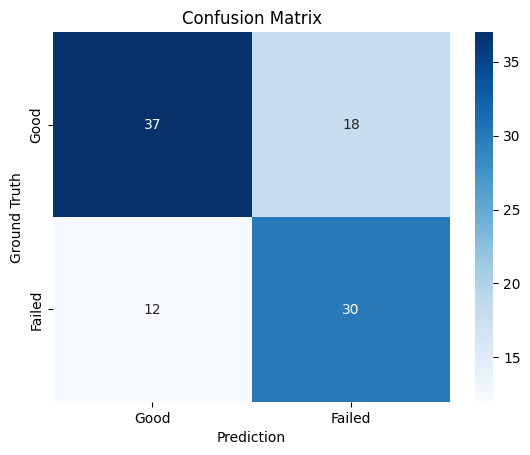

In [10]:
# evaluation parameters
prediction_class_to_value_map = {'Good': 0, 'Failed': 1}
prediction_classes = ['Good', 'Failed']

# creating confusion matrix
y_true = df_results_image_based.truth
y_pred = df_results_image_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
export_path = Path(export_params['export_path'])
save_path_cf_matrix = export_path / 'image_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)

# Sample-based evaluation

In [11]:
df_results_sample_based = convert_test_scores_to_sample_scores(df_results_image_based)
df_results_sample_based

prediction  truth
category             sample revolution                   
C61_Airline_balanced 1      2                    1      1
                            5                    1      0
                     2      5                    0      1
                            6                    0      1
                     3      4                    1      0
...                                            ...    ...
                     70     5                    1      1
                            9                    1      1
                     71     3                    1      0
                            10                   1      1
                     73     5                    1      0

[90 rows x 2 columns]

In [12]:
# save sample based data frame to csv file
save_path_sample_based_csv= export_path / 'sample_based_test_scores.csv'
df_results_sample_based.to_csv(save_path_sample_based_csv)

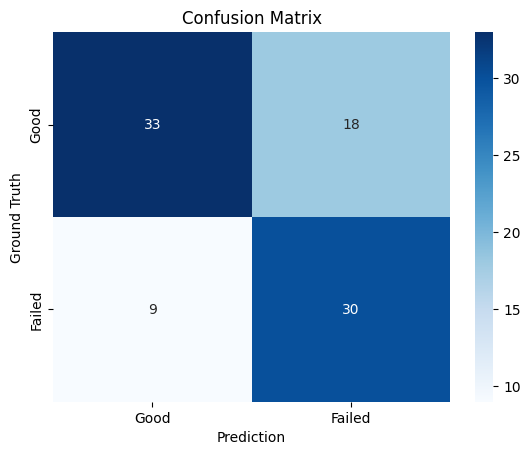

In [13]:
# creating confusion matrix
y_true = df_results_sample_based.truth
y_pred = df_results_sample_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
save_path_cf_matrix = export_path / 'sample_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)